Topic:- Electric Vehicle Population Data Analysis

Objectives-:

1) Data Exploration and Cleaning

In [8]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


# Step 2: Load the dataset
file_path = "Electric_Vehicle_Population_Data.csv"
df = pd.read_csv(file_path)

# Step 3: Preview the data
print("First 5 rows:")
display(df.head())

print("\nDataset Info:")
df.info()

# Step 4: Basic statistics
print("\nBasic statistics:")
display(df.describe(include='all'))

# Step 5: Check for missing values
print("\nMissing values:")
display(df.isnull().sum())

# Step 6: Drop duplicate rows
before_dropping = df.shape[0]
df.drop_duplicates(inplace=True)
after_dropping = df.shape[0]
print(f"\nDropped {before_dropping - after_dropping} duplicate rows.")

# Step 7: Handle missing values (example: fill or drop)
# Here we fill missing values with "Unknown" for categorical, median for numerical
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna('Unknown', inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

# Step 8: Convert data types if needed (example)
# df['Model Year'] = df['Model Year'].astype('int')

# Step 9: Clean column names (optional)
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()

# Step 10: Final check
print("\nCleaned Data Preview:")
display(df.head())
print("\nMissing values after cleaning:")
display(df.isnull().sum())


First 5 rows:


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EBXK,King,Seattle,WA,98178.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,37.0,477309682,POINT (-122.23825 47.49461),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,5YJYGDEE3L,Kitsap,Poulsbo,WA,98370.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,23.0,109705683,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,KM8KRDAF5P,Kitsap,Olalla,WA,98359.0,2023,HYUNDAI,IONIQ 5,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,26.0,230390492,POINT (-122.54729 47.42602),PUGET SOUND ENERGY INC,5.303509e+10
3,5UXTA6C0XM,Kitsap,Seabeck,WA,98380.0,2021,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30.0,0.0,35.0,267929112,POINT (-122.81585 47.64509),PUGET SOUND ENERGY INC,5.303509e+10
4,JTMAB3FV7P,Thurston,Rainier,WA,98576.0,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,2.0,236505139,POINT (-122.68993 46.88897),PUGET SOUND ENERGY INC,5.306701e+10



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235692 entries, 0 to 235691
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         235692 non-null  object 
 1   County                                             235689 non-null  object 
 2   City                                               235689 non-null  object 
 3   State                                              235692 non-null  object 
 4   Postal Code                                        235689 non-null  float64
 5   Model Year                                         235692 non-null  int64  
 6   Make                                               235692 non-null  object 
 7   Model                                              235692 non-null  object 
 8   Electric Vehicle Type                              235692 n

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
count,235692,235689,235689,235692,235689.000000,235692.000000,235692,235692,235692,235692,235656.000000,235656.000000,235198.000000,2.356920e+05,235682,235689,2.356890e+05
unique,13763,212,788,48,NaN,NaN,46,171,2,3,NaN,NaN,NaN,NaN,957,76,NaN
top,7SAYGDEE6P,King,Seattle,WA,NaN,NaN,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,NaN,NaN,NaN,NaN,POINT (-122.13158 47.67858),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),NaN
freq,1190,118711,37410,235198,NaN,NaN,101080,49253,186998,139761,NaN,NaN,NaN,NaN,5824,85298,NaN
mean,NaN,NaN,NaN,NaN,98177.656463,2021.406658,NaN,NaN,NaN,NaN,46.262569,787.268328,28.879519,2.353127e+08,NaN,NaN,5.298066e+10
std,NaN,NaN,NaN,NaN,2524.218661,2.991908,NaN,NaN,NaN,NaN,84.045829,7177.668305,14.904644,6.799098e+07,NaN,NaN,1.521066e+09
min,NaN,NaN,NaN,NaN,1731.000000,2000.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,4.385000e+03,NaN,NaN,1.001020e+09
25%,NaN,NaN,NaN,NaN,98052.000000,2020.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,17.000000,2.053457e+08,NaN,NaN,5.303301e+10
50%,NaN,NaN,NaN,NaN,98126.000000,2023.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,32.000000,2.522795e+08,NaN,NaN,5.303303e+10
75%,NaN,NaN,NaN,NaN,98374.000000,2024.000000,NaN,NaN,NaN,NaN,38.000000,0.000000,42.000000,2.696401e+08,NaN,NaN,5.305307e+10



Missing values:


VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                        36
Base MSRP                                             36
Legislative District                                 494
DOL Vehicle ID                                         0
Vehicle Location                                      10
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64


Dropped 0 duplicate rows.

Cleaned Data Preview:


,vin_(1-10),county,city,state,postal_code,model_year,make,model,electric_vehicle_type,clean_alternative_fuel_vehicle_(cafv)_eligibility,electric_range,base_msrp,legislative_district,dol_vehicle_id,vehicle_location,electric_utility,2020_census_tract
0,5YJ3E1EBXK,King,Seattle,WA,98178.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,37.0,477309682,POINT (-122.23825 47.49461),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,5YJYGDEE3L,Kitsap,Poulsbo,WA,98370.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,23.0,109705683,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,KM8KRDAF5P,Kitsap,Olalla,WA,98359.0,2023,HYUNDAI,IONIQ 5,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,26.0,230390492,POINT (-122.54729 47.42602),PUGET SOUND ENERGY INC,5.303509e+10
3,5UXTA6C0XM,Kitsap,Seabeck,WA,98380.0,2021,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30.0,0.0,35.0,267929112,POINT (-122.81585 47.64509),PUGET SOUND ENERGY INC,5.303509e+10
4,JTMAB3FV7P,Thurston,Rainier,WA,98576.0,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,2.0,236505139,POINT (-122.68993 46.88897),PUGET SOUND ENERGY INC,5.306701e+10



Missing values after cleaning:


vin_(1-10)                                           0
county                                               0
city                                                 0
state                                                0
postal_code                                          0
model_year                                           0
make                                                 0
model                                                0
electric_vehicle_type                                0
clean_alternative_fuel_vehicle_(cafv)_eligibility    0
electric_range                                       0
base_msrp                                            0
legislative_district                                 0
dol_vehicle_id                                       0
vehicle_location                                     0
electric_utility                                     0
2020_census_tract                                    0
dtype: int64

2) Describe Analytics

In [9]:
# Step 2: Descriptive Analytics

# 1. Shape of the dataset
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.\n")

# 2. Summary statistics for numerical features
print("Summary statistics for numerical features:")
display(df.describe())

# 3. Summary statistics for categorical features
print("\nValue counts for categorical features:")
for col in df.select_dtypes(include='object').columns:
    print(f"\nColumn: {col}")
    display(df[col].value_counts().head(10))  # Top 10 frequent values

# 4. Unique values per column
print("\nUnique values per column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

# 5. Correlation matrix (if applicable)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
if len(numerical_cols) >= 2:
    print("\nCorrelation matrix:")
    corr_matrix = df[numerical_cols].corr()
    display(corr_matrix)

# 6. Group by analysis example: EVs by Make
print("\nTop 10 EV Makes:")
display(df['make'].value_counts().head(10))

# 7. EVs by Model Year
print("\nEV count by Model Year:")
display(df['model_year'].value_counts().sort_index())

# 8. Optional: Crosstab - EVs by Make and Electric Vehicle Type
print("\nEV Types per Make:")
ev_type_by_make = pd.crosstab(df['make'], df['electric_vehicle_type'])
display(ev_type_by_make.head(10))


Dataset contains 235692 rows and 17 columns.

Summary statistics for numerical features:


,postal_code,model_year,electric_range,base_msrp,legislative_district,dol_vehicle_id,2020_census_tract
count,235692.000000,235692.000000,235692.000000,235692.000000,235692.000000,2.356920e+05,2.356920e+05
mean,98177.655805,2021.406658,46.255503,787.148079,28.886059,2.353127e+08,5.298066e+10
std,2524.202602,2.991908,84.041354,7177.126712,14.889700,6.799098e+07,1.521056e+09
min,1731.000000,2000.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2020.000000,0.000000,0.000000,17.000000,2.053457e+08,5.303301e+10
50%,98126.000000,2023.000000,0.000000,0.000000,32.000000,2.522795e+08,5.303303e+10
75%,98374.000000,2024.000000,38.000000,0.000000,42.000000,2.696401e+08,5.305307e+10
max,99577.000000,2025.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.602100e+10



Value counts for categorical features:

Column: vin_(1-10)


vin_(1-10)
7SAYGDEE6P    1190
7SAYGDEE7P    1187
7SAYGDEE5P    1155
7SAYGDEE8P    1148
7SAYGDEEXP    1141
7SAYGDEE0P    1123
7SAYGDEE2P    1122
7SAYGDEE9P    1119
7SAYGDEE4P    1092
7SAYGDEE1P    1091
Name: count, dtype: int64


Column: county


county
King         118711
Snohomish     28814
Pierce        19256
Clark         14101
Thurston       8595
Kitsap         7901
Spokane        6582
Whatcom        5703
Benton         3043
Skagit         2677
Name: count, dtype: int64


Column: city


city
Seattle      37410
Bellevue     11509
Vancouver     8510
Redmond       8211
Bothell       7739
Renton        6707
Kirkland      6697
Sammamish     6642
Olympia       5638
Tacoma        5155
Name: count, dtype: int64


Column: state


state
WA    235198
CA       112
VA        62
MD        38
TX        28
CO        21
FL        19
NC        18
GA        15
NY        11
Name: count, dtype: int64


Column: make


make
TESLA         101080
CHEVROLET      17135
NISSAN         15532
FORD           12605
KIA            11345
BMW             9647
TOYOTA          9478
HYUNDAI         7406
RIVIAN          6750
VOLKSWAGEN      5976
Name: count, dtype: int64


Column: model


model
MODEL Y           49253
MODEL 3           36065
LEAF              13814
MODEL S            7885
BOLT EV            7278
MODEL X            6535
MUSTANG MACH-E     5109
ID.4               4842
VOLT               4709
WRANGLER           4425
Name: count, dtype: int64


Column: electric_vehicle_type


electric_vehicle_type
Battery Electric Vehicle (BEV)            186998
Plug-in Hybrid Electric Vehicle (PHEV)     48694
Name: count, dtype: int64


Column: clean_alternative_fuel_vehicle_(cafv)_eligibility


clean_alternative_fuel_vehicle_(cafv)_eligibility
Eligibility unknown as battery range has not been researched    139761
Clean Alternative Fuel Vehicle Eligible                          73317
Not eligible due to low battery range                            22614
Name: count, dtype: int64


Column: vehicle_location


vehicle_location
POINT (-122.13158 47.67858)    5824
POINT (-122.21061 47.83448)    4457
POINT (-122.2066 47.67887)     3825
POINT (-122.12096 47.55584)    3644
POINT (-122.1872 47.61001)     3459
POINT (-122.31676 47.68156)    3391
POINT (-122.29179 47.43473)    3382
POINT (-122.02054 47.60326)    3166
POINT (-122.15545 47.75448)    3052
POINT (-122.22901 47.72201)    2951
Name: count, dtype: int64


Column: electric_utility


electric_utility
PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)                                      85298
PUGET SOUND ENERGY INC                                                             48923
CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)                                       40106
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF CLARK COUNTY - (WA)                   13761
BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY    10685
PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM COUNTY                                  5385
BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||INLAND POWER & LIGHT COMPANY          4001
BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOHOMISH COUNTY                          2129
PACIFICORP                                                                          1947
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF BENTON COUNTY                          1788
Name: count, dtype: int64


Unique values per column:
vin_(1-10): 13763 unique values
county: 213 unique values
city: 789 unique values
state: 48 unique values
postal_code: 959 unique values
model_year: 20 unique values
make: 46 unique values
model: 171 unique values
electric_vehicle_type: 2 unique values
clean_alternative_fuel_vehicle_(cafv)_eligibility: 3 unique values
electric_range: 109 unique values
base_msrp: 31 unique values
legislative_district: 49 unique values
dol_vehicle_id: 235692 unique values
vehicle_location: 958 unique values
electric_utility: 77 unique values
2020_census_tract: 2204 unique values

Correlation matrix:


,postal_code,model_year,electric_range,base_msrp,legislative_district,dol_vehicle_id,2020_census_tract
postal_code,1.000000,0.002390,-0.001880,-0.001348,-0.058736,0.005960,0.532709
model_year,0.002390,1.000000,-0.531127,-0.228822,-0.013232,0.263290,0.007286
electric_range,-0.001880,-0.531127,1.000000,0.116824,0.016013,-0.160848,-0.002267
base_msrp,-0.001348,-0.228822,0.116824,1.000000,0.009980,-0.046272,-0.001523
legislative_district,-0.058736,-0.013232,0.016013,0.009980,1.000000,-0.007883,-0.009264
dol_vehicle_id,0.005960,0.263290,-0.160848,-0.046272,-0.007883,1.000000,0.003755
2020_census_tract,0.532709,0.007286,-0.002267,-0.001523,-0.009264,0.003755,1.000000



Top 10 EV Makes:


make
TESLA         101080
CHEVROLET      17135
NISSAN         15532
FORD           12605
KIA            11345
BMW             9647
TOYOTA          9478
HYUNDAI         7406
RIVIAN          6750
VOLKSWAGEN      5976
Name: count, dtype: int64


EV count by Model Year:


model_year
2000        7
2002        2
2003        1
2008       22
2010       23
2011      680
2012     1490
2013     4230
2014     3407
2015     4661
2016     5306
2017     8570
2018    14368
2019    10974
2020    12265
2021    20615
2022    28958
2023    59893
2024    49044
2025    11176
Name: count, dtype: int64


EV Types per Make:


electric_vehicle_type,Battery Electric Vehicle (BEV),Plug-in Hybrid Electric Vehicle (PHEV)
make,,
ACURA,203,0
ALFA ROMEO,0,97
AUDI,2462,1898
AZURE DYNAMICS,4,0
BENTLEY,0,6
BMW,3850,5797
BRIGHTDROP,5,0
CADILLAC,1059,90
CHEVROLET,12426,4709


3) Trend Analysis

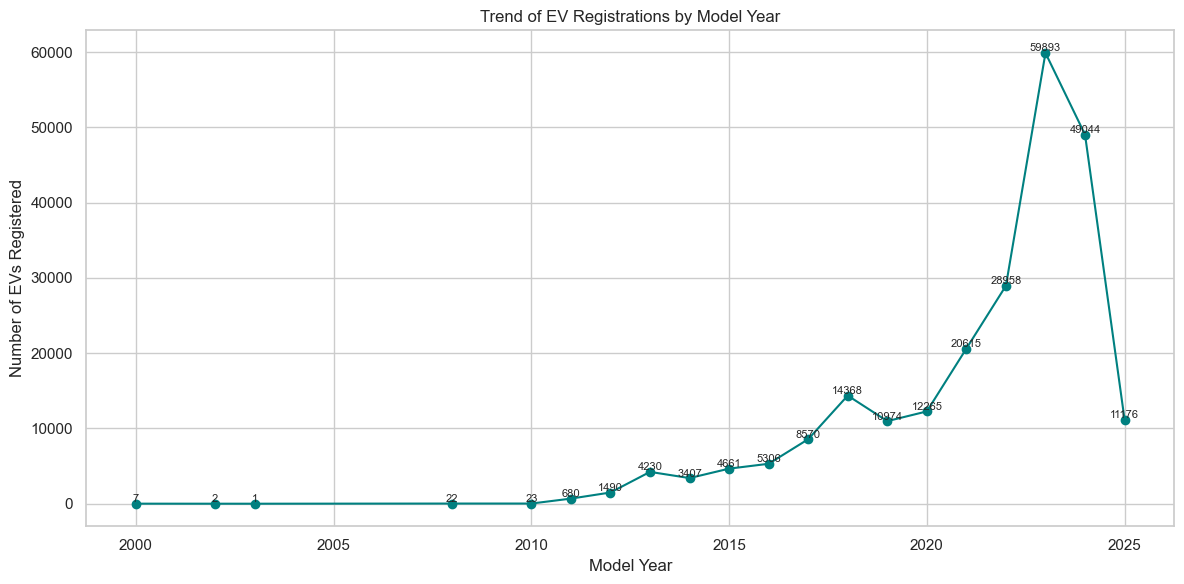

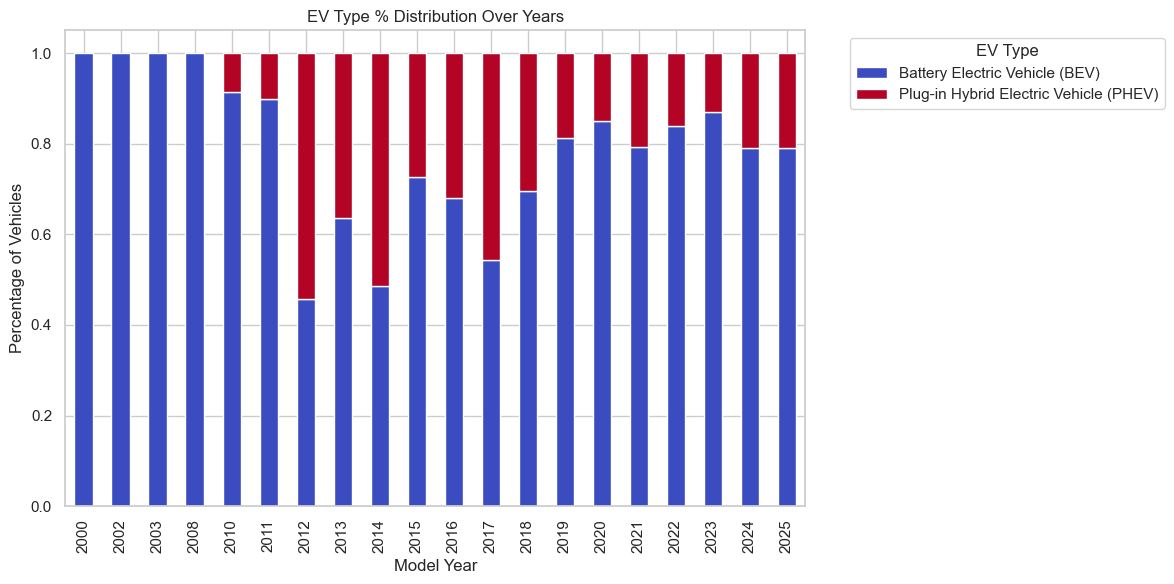

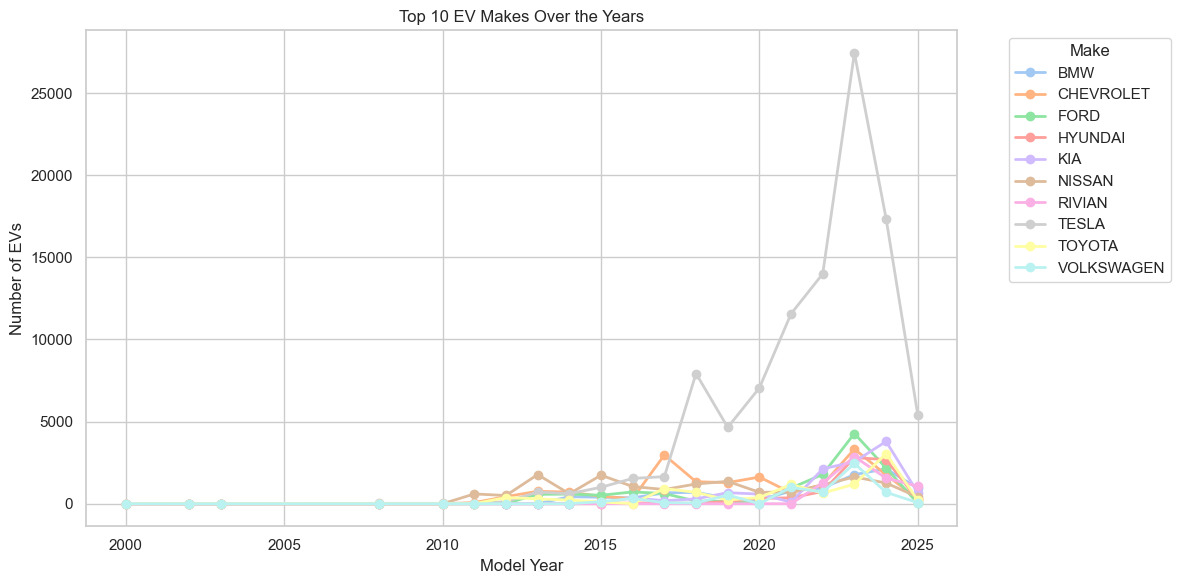

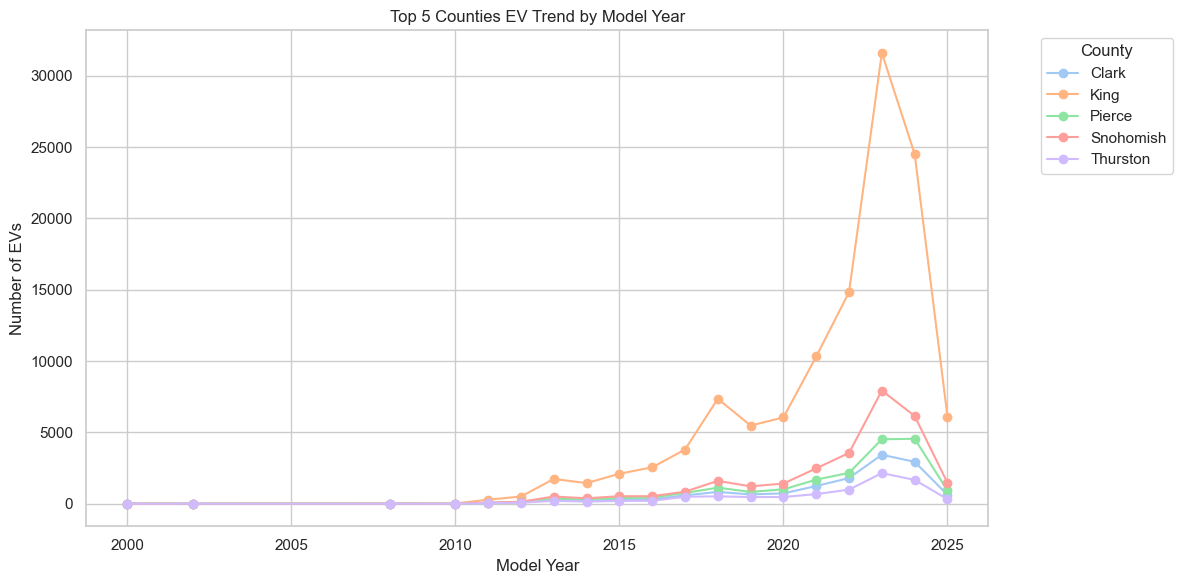

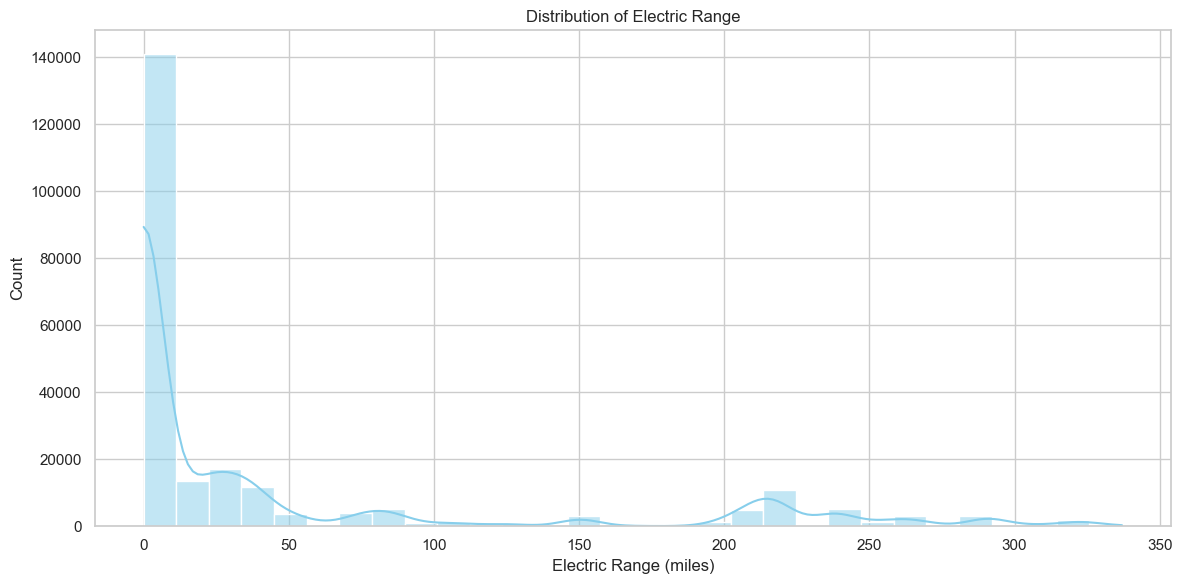

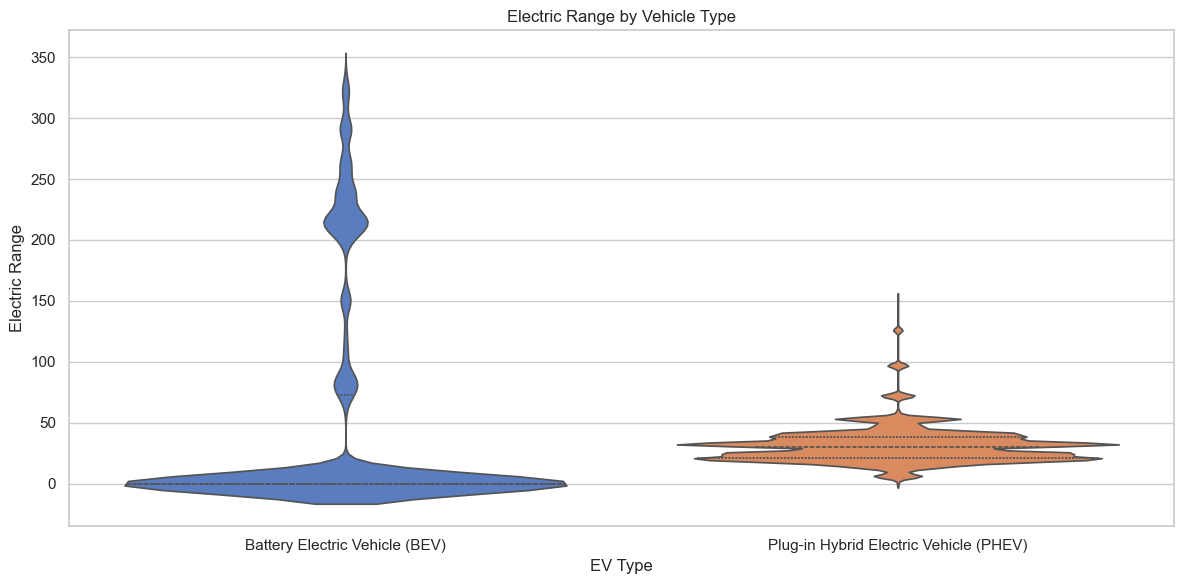

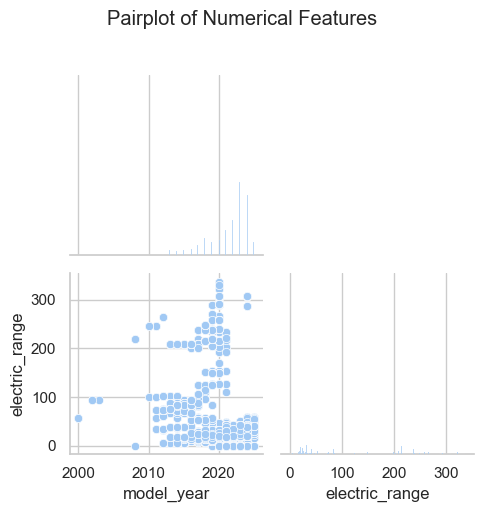

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Styling
sns.set(style="whitegrid", palette="pastel")
plt.rcParams['figure.figsize'] = (12, 6)

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# 1. 🔹 EV Registrations Over Time
ev_trend = df['model_year'].value_counts().sort_index()
ev_trend.plot(kind='line', marker='o', color='teal')
plt.title('Trend of EV Registrations by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Number of EVs Registered')
plt.grid(True)
for x, y in ev_trend.items():
    plt.text(x, y + 200, f"{y}", ha='center', fontsize=8)
plt.tight_layout()
plt.show()

# 2. EV Type Distribution Over Years (Normalized %)
ev_type_trend = df.groupby(['model_year', 'electric_vehicle_type']).size().unstack().fillna(0)
ev_type_percent = ev_type_trend.div(ev_type_trend.sum(axis=1), axis=0)

ev_type_percent.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('EV Type % Distribution Over Years')
plt.xlabel('Model Year')
plt.ylabel('Percentage of Vehicles')
plt.legend(title='EV Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 3. Trend by Top 10 EV Makes
top_makes = df['make'].value_counts().head(10).index
make_trend = df[df['make'].isin(top_makes)].groupby(['model_year', 'make']).size().unstack().fillna(0)

make_trend.plot(marker='o', linewidth=2)
plt.title('Top 10 EV Makes Over the Years')
plt.xlabel('Model Year')
plt.ylabel('Number of EVs')
plt.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 4. Trend by Top 5 Counties
if 'county' in df.columns:
    top_counties = df['county'].value_counts().head(5).index
    county_trend = df[df['county'].isin(top_counties)].groupby(['model_year', 'county']).size().unstack().fillna(0)

    county_trend.plot(marker='o')
    plt.title('Top 5 Counties EV Trend by Model Year')
    plt.xlabel('Model Year')
    plt.ylabel('Number of EVs')
    plt.legend(title='County', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# 5. Histogram of Electric Range (if available)
if 'electric_range' in df.columns:
    plt.figure()
    sns.histplot(df['electric_range'].dropna(), bins=30, kde=True, color='skyblue')
    plt.title('Distribution of Electric Range')
    plt.xlabel('Electric Range (miles)')
    plt.tight_layout()
    plt.show()

# 6. Violin Plot of Electric Range by EV Type
if 'electric_range' in df.columns:
    plt.figure()
    sns.violinplot(data=df, x='electric_vehicle_type', y='electric_range', inner='quartile', palette='muted')
    plt.title('Electric Range by Vehicle Type')
    plt.xlabel('EV Type')
    plt.ylabel('Electric Range')
    plt.tight_layout()
    plt.show()

# 7. Pairplot for Selected Numerical Features
numeric_cols = df.select_dtypes(include='number').columns.tolist()
selected_cols = [col for col in ['model_year', 'electric_range'] if col in numeric_cols]

if len(selected_cols) >= 2:
    sns.pairplot(df[selected_cols].dropna(), corner=True)
    plt.suptitle("Pairplot of Numerical Features", y=1.02)
    plt.tight_layout()
    plt.show()


4) Geographical Insights

EV Count by County:


county
King         118711
Snohomish     28814
Pierce        19256
Clark         14101
Thurston       8595
Kitsap         7901
Spokane        6582
Whatcom        5703
Benton         3043
Skagit         2677
Name: count, dtype: int64

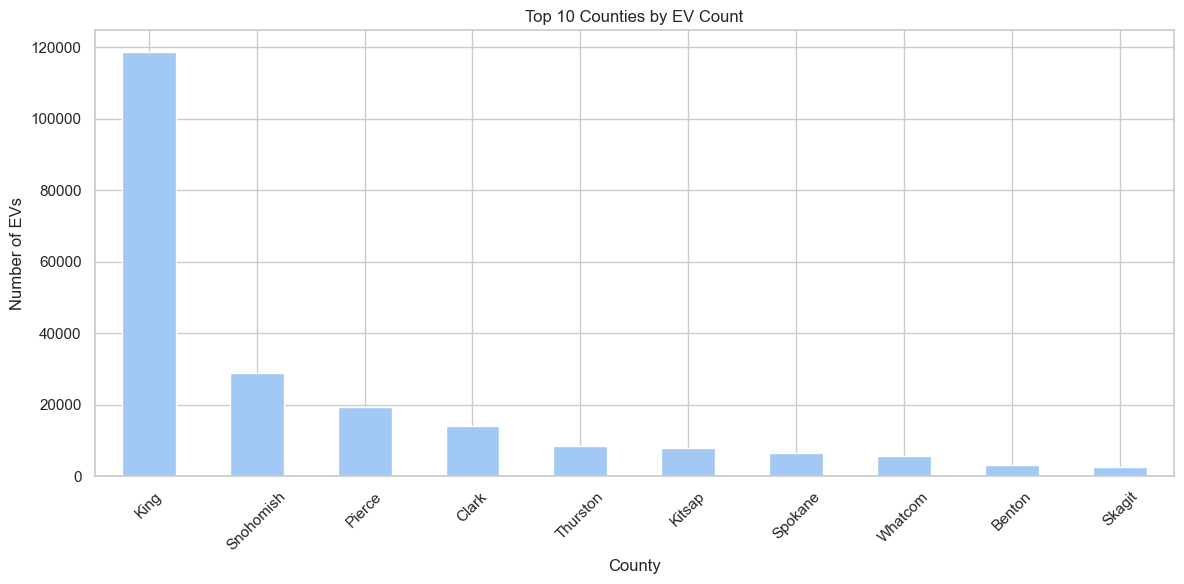

EV Count by City:


city
Seattle      37410
Bellevue     11509
Vancouver     8510
Redmond       8211
Bothell       7739
Renton        6707
Kirkland      6697
Sammamish     6642
Olympia       5638
Tacoma        5155
Name: count, dtype: int64

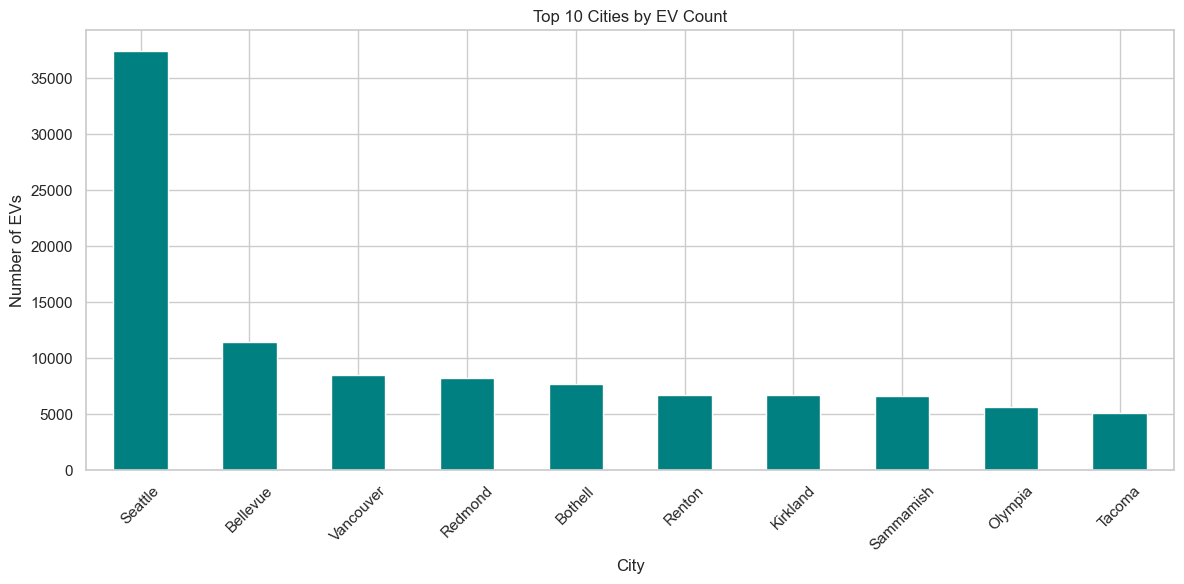

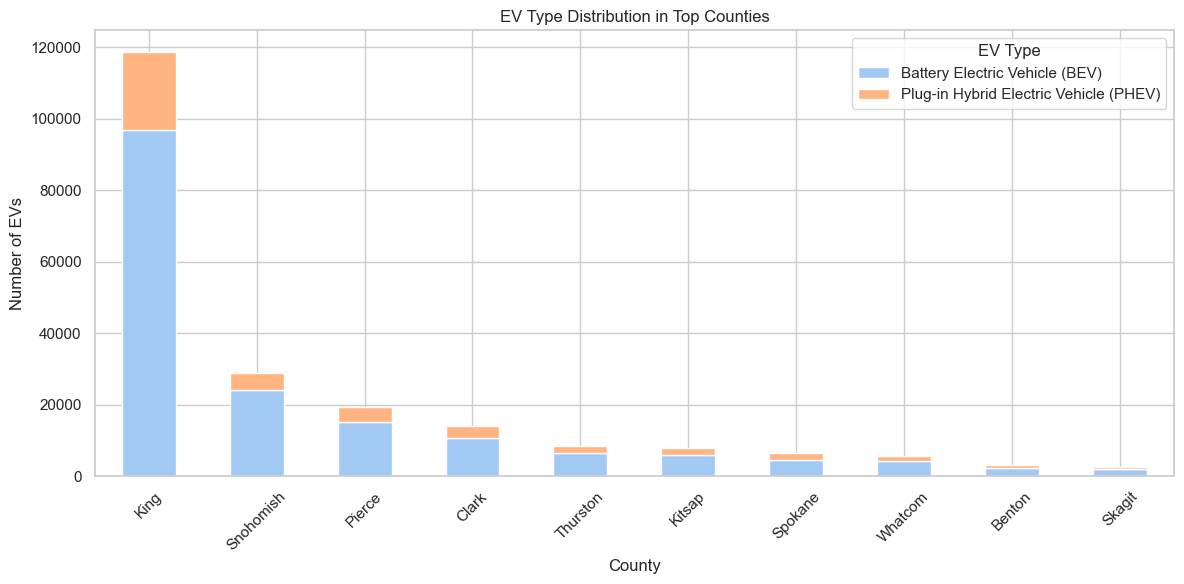

In [11]:
# 1. EV distribution by County
print("EV Count by County:")
county_distribution = df['county'].value_counts().head(10)
display(county_distribution)

# Bar plot
county_distribution.plot(kind='bar')
plt.title("Top 10 Counties by EV Count")
plt.xlabel("County")
plt.ylabel("Number of EVs")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. EV distribution by City
print("EV Count by City:")
city_distribution = df['city'].value_counts().head(10)
display(city_distribution)

# Bar plot
city_distribution.plot(kind='bar', color='teal')
plt.title("Top 10 Cities by EV Count")
plt.xlabel("City")
plt.ylabel("Number of EVs")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Optional: EV Type by County (Stacked)
ev_type_by_county = df.groupby(['county', 'electric_vehicle_type']).size().unstack().fillna(0)
top_counties = county_distribution.index
ev_type_by_county = ev_type_by_county.loc[top_counties]

# Plot stacked bar chart
ev_type_by_county.plot(kind='bar', stacked=True)
plt.title("EV Type Distribution in Top Counties")
plt.xlabel("County")
plt.ylabel("Number of EVs")
plt.xticks(rotation=45)
plt.legend(title='EV Type')
plt.tight_layout()
plt.show()


5) Ev Infrastructure Correlation

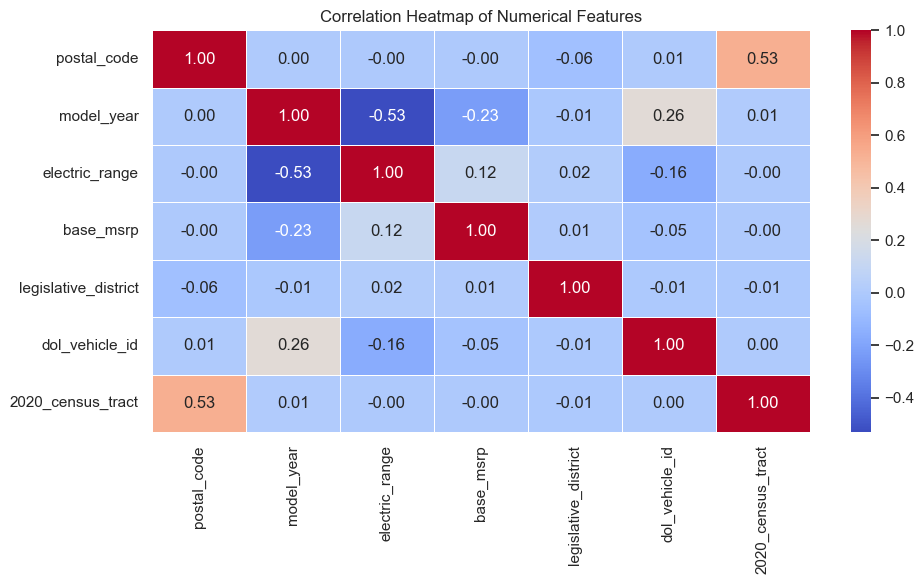

In [12]:

# Optional: Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Select numeric columns only
numeric_df = df.select_dtypes(include='number')

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()


0) Scatter Plot: model_year vs. electric_range

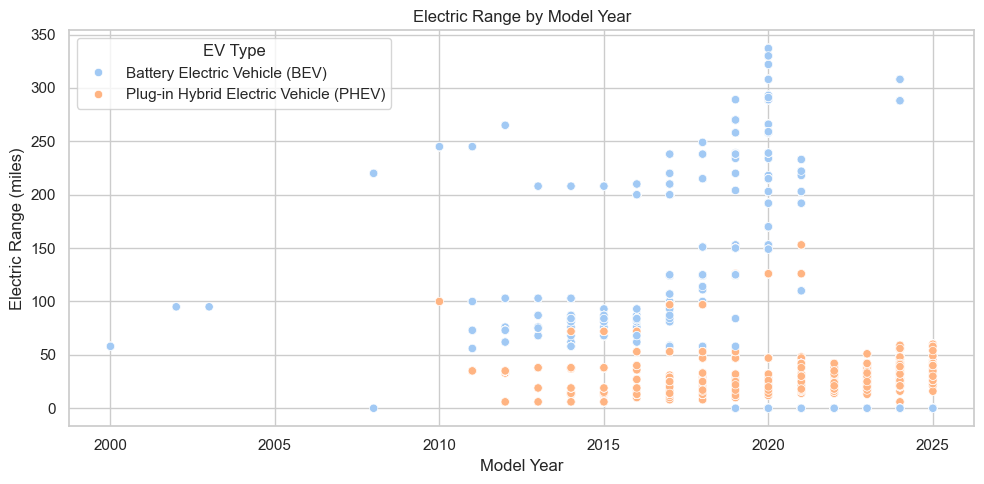

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='model_year', y='electric_range', hue='electric_vehicle_type')
plt.title('Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Electric Range (miles)')
plt.legend(title='EV Type')
plt.grid(True)
plt.tight_layout()
plt.show()



Creativity and Innovation:

1) Word Cloud of Popular EV Makes

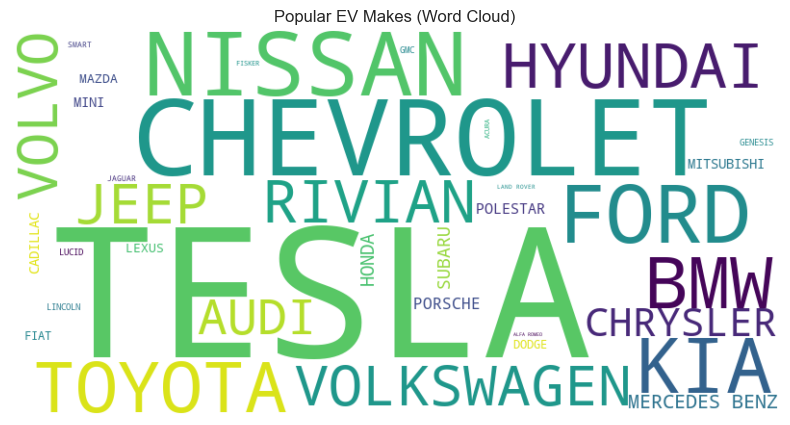

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all EV makes into one big string
text = ' '.join(df['make'].dropna().astype(str))

# Create and display the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Popular EV Makes (Word Cloud)")
plt.show()


2) Radar Plot Comparing Top EV Makes by Model Diversity

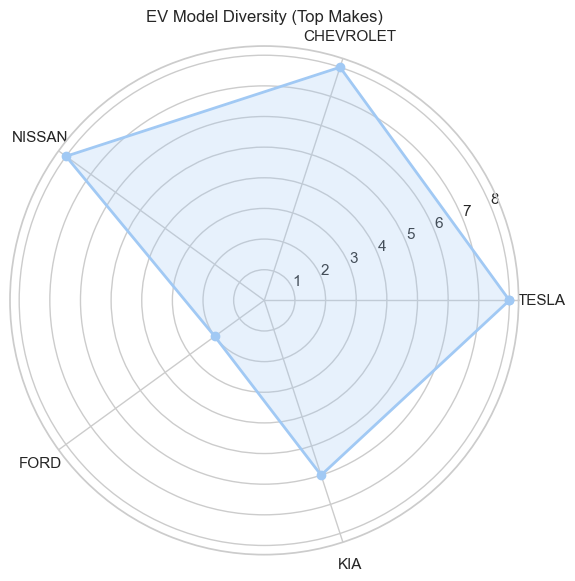

In [16]:
import numpy as np

top_makes = df['make'].value_counts().head(5).index
make_model_counts = df[df['make'].isin(top_makes)].groupby(['make', 'model']).size().unstack().fillna(0)

# Normalize model diversity
model_diversity = (make_model_counts > 0).sum(axis=1)

labels = list(top_makes)
values = model_diversity.values

# Radar setup
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
values = list(values)
values += values[:1]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.plot(angles, values, 'o-', linewidth=2)
ax.fill(angles, values, alpha=0.25)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
plt.title("EV Model Diversity (Top Makes)")
plt.tight_layout()
plt.show()
